In [1]:
from datasetcontroller.datacontroller import DataController
import os
from treemodules.regressiontreemodule import GradientBoosting
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
# 데이터셋 폴더 경로 설정
path = os.path.join("/workspace")
data_path = os.path.join(path,'cmaqProjectdata')

# 모델 체크포인트
proj_path = os.path.join(path,'repos','cmaqProject')
checkpoint_dir = os.path.join(proj_path,'models','training_checkpoints',"model_conmat_cmaq_4_checkpoint")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# 컨트롤러
datacontroller = DataController(data_path = data_path)

# 기본 control matrix, smoke, cmaq 데이터셋 
control_matrix, smoke_arr, target_arr = datacontroller.get_yearly_dataset()

#
trainset_len = 100
x_train, x_test = smoke_arr[:trainset_len], smoke_arr[trainset_len:]
y_train, y_test = target_arr[:trainset_len], target_arr[trainset_len:]

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


67 82


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3460: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/workspace/repos/cmaqProject/experiment/datasetcontroller/datacontroller.py:54: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:5179 +type=crs
Right CRS: EPSG:5179

  joined = gpd.sjoin(ctp_rvn_gpd, grid_data.to_crs(5179), op='contains')


In [3]:
n_booster = 10
k_size = [10,10]
k_n = 30
min_sam_leaf = 50

booster = GradientBoosting(max_depth=5,
                            i_depth=0,
                            minimum_sample_leaf=min_sam_leaf,
                            y_val=y_train, # y_train
                            x_val=x_train, # x_train
                            is_terminal=False,

                            kernel_size=k_size,
                            kernel_n=k_n,

                            input_shape=x_train.shape,

                            sample_ratio_by_tree=0.5,
                            n_booster=n_booster,
                            learning_rate=0.3,
                            )
booster.booster_train()

train_loss:  5.8746924    val_loss:  5.886687
train_loss:  4.1123037    val_loss:  4.1331406
train_loss:  2.8787942    val_loss:  2.9003897
train_loss:  2.015895    val_loss:  2.0353522
train_loss:  1.412414    val_loss:  1.4335802
train_loss:  0.9906206    val_loss:  1.0130723
train_loss:  0.69625044    val_loss:  0.7186098
train_loss:  0.4920889    val_loss:  0.5166969
train_loss:  0.3528712    val_loss:  0.3843121


0.36898685
0.3971316


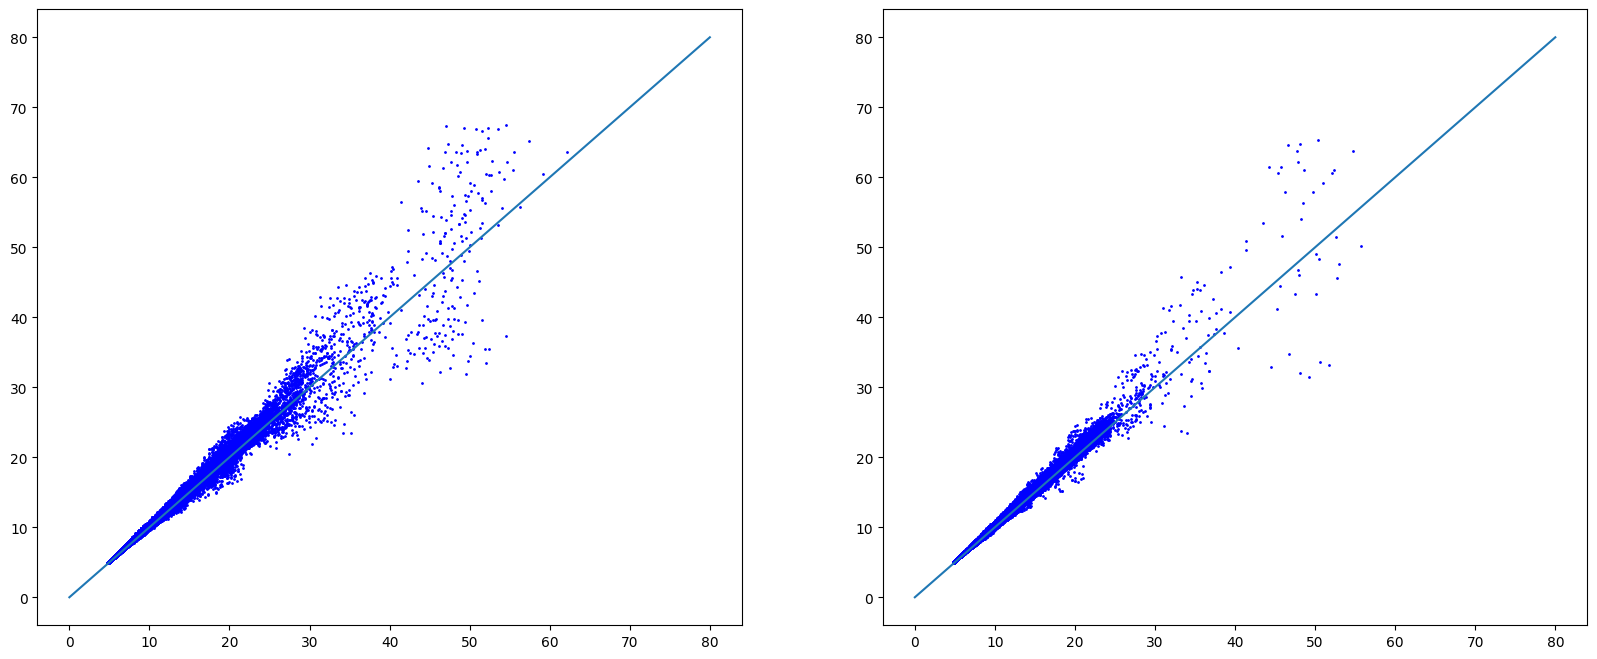

In [8]:
pred = booster.booster_prediction(x_train)
pred_test = booster.booster_prediction(x_test)

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.plot(pred.reshape(-1), y_train.reshape(-1),'bo', markersize=1)
plt.plot([0,80],[0,80])
print(np.mean(np.abs(pred.reshape(-1) - y_train.reshape(-1))))

plt.subplot(1,2,2)
plt.plot(pred_test.reshape(-1), y_test.reshape(-1),'bo', markersize=1)
plt.plot([0,80],[0,80])
print(np.mean(np.abs(pred_test.reshape(-1) - y_test.reshape(-1))))

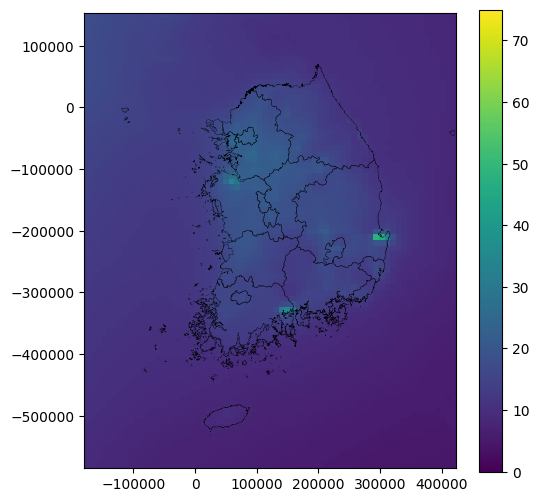

In [9]:
# 예측
plot = datacontroller.get_ctp_based_pred_map(pred_arr = pred_test[0][::-1])

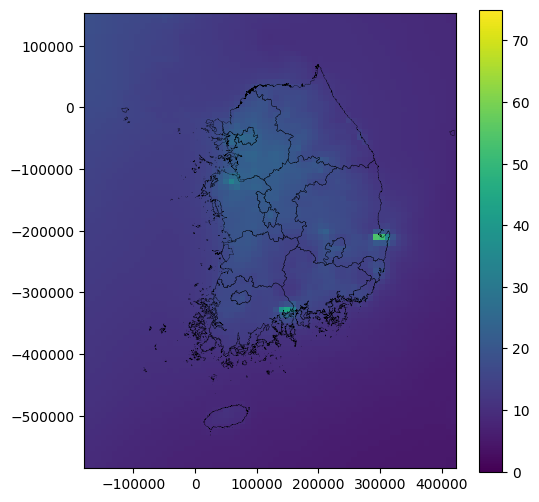

In [10]:
# 타겟
plot = datacontroller.get_ctp_based_pred_map(pred_arr = y_test[0][::-1])

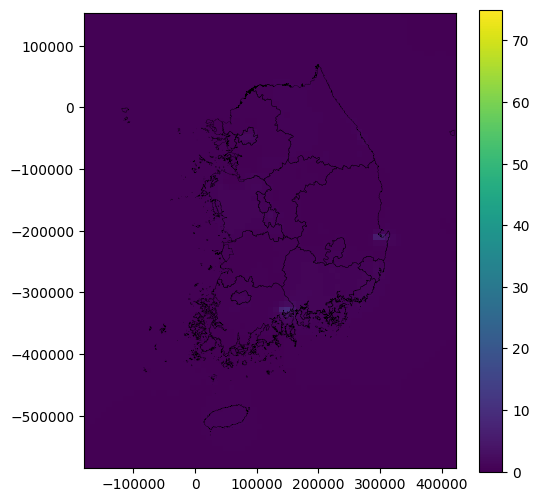

In [11]:
# 잔차
plot = datacontroller.get_ctp_based_pred_map(pred_arr = y_test[0][::-1] - pred_test[0][::-1])